In [4]:
import pandas as pd
data=pd.read_csv("data/ML_Houses_dataset.csv")
# Shuffling the data
data = data.sample(frac=1)

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1166,1167,20,RL,64.0,10475,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,245350
1198,1199,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,178000
1667,1367,60,RL,68.0,9179,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Abnorml,193000
1149,1150,70,RM,50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,143000
576,577,50,RL,52.0,6292,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,145000


In [6]:
livecode_data=data[['GrLivArea','SalePrice']]
livecode_data.head()

,GrLivArea,SalePrice
1166,1694,245350
1198,1212,178000
1667,1790,193000
1149,1482,143000
576,1477,145000


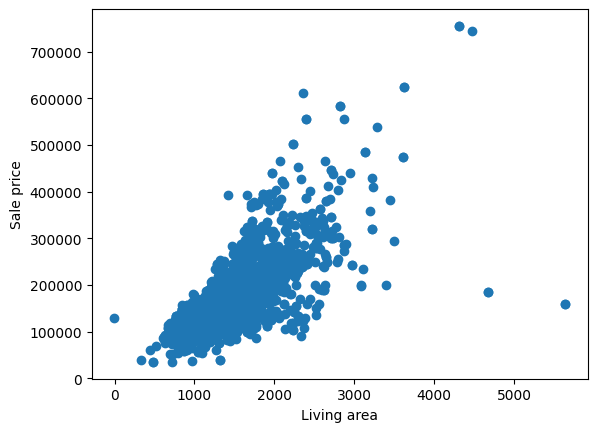

In [7]:
import matplotlib.pyplot as plt

# Plot living aera vs Sale price
plt.scatter(data['GrLivArea'],data['SalePrice'])

#Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

# Instantiate the model (💡 in Sklearn often called "estimator")
model=LinearRegression()

# Define X and y
X=data[['GrLivArea']]
y=data['SalePrice']

# Train the model on the data
model.fit(X,y)

LinearRegression()

In [9]:
#View the model's slope (a)
model.coef_

array([105.00927564])

In [10]:
#View the model's intercept (b)
model.intercept_

22104.12101002087

In [11]:
#Evaluate the model's performance
model.score(X,y)

0.48960426399689116

In [12]:
# Predict on new data
new_data=pd.DataFrame({'GrLivArea':[1000]})

model.predict(new_data)

array([127113.39664561])

In [13]:
 livecode_data.head()

,GrLivArea,SalePrice
1166,1694,245350
1198,1212,178000
1667,1790,193000
1149,1482,143000
576,1477,145000


In [14]:
from sklearn.model_selection import train_test_split
# split the data into train and test
train_data, test_data = train_test_split(livecode_data, test_size=
0.3)
# Ready X's and y's
X_train = train_data[['GrLivArea']]
y_train = train_data['SalePrice']

X_test = test_data[['GrLivArea']]
y_test = test_data['SalePrice']

In [15]:
# Instantiate the model
model = LinearRegression()
# Train the model on the Training data
model.fit(X_train, y_train)
# Score the model on the Test data
model.score(X_test,y_test)

0.5090022829080829

In [62]:
### RUN THIS CELL MULTIPLE TIMES TO SEE DIFFERENT SCORES
# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size
=0.3)
# Instantiate the model
model = LinearRegression()
# Train the model on the Training data
model.fit(X_train, y_train)
# Score the model on the Test data
model.score(X_test,y_test)

ValueError: could not convert string to float: 'RL'

In [17]:
from sklearn.model_selection import cross_validate
# Instantiate model
model = LinearRegression()
# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)
# Scores
print(cv_results['test_score'])
# Mean of scores
cv_results['test_score'].mean()

[0.553747   0.45386034 0.46320258 0.47444881 0.4730525 ]


0.4836622487078045

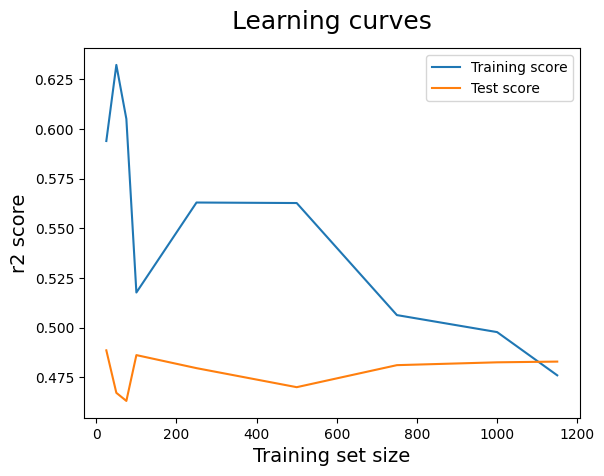

In [18]:
import numpy as np
from sklearn.model_selection import learning_curve
train_sizes = [25,50,75,100,250,500,750,1000,1150]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
 estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [19]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1166,1167,20,RL,64.0,10475,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,245350
1198,1199,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,178000
1667,1367,60,RL,68.0,9179,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Abnorml,193000
1149,1150,70,RM,50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,143000
576,577,50,RL,52.0,6292,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,145000


In [20]:
data[["GrLivArea","SalePrice"]].head(10)

,GrLivArea,SalePrice
1166,1694,245350
1198,1212,178000
1667,1790,193000
1149,1482,143000
576,1477,145000
659,1486,167000
1101,950,119500
371,1588,134432
62,1370,202500
844,1416,153900


In [21]:
len(data) # Check number of rows before removing duplicates

1760

In [22]:
data.duplicated() # Check whether a row is a duplicated version of a previous row

1166    False
1198    False
1667    False
1149    False
576     False
        ...  
270     False
1206    False
869     False
546     False
239     False
Length: 1760, dtype: bool

In [23]:
 data.duplicated().sum() # Compute the number of duplicated rows

300

In [24]:
data = data.drop_duplicates() # Remove duplicates
len(data)# Check new number of rows

1460

In [25]:
# Counting the number of NaN for each column
data.isnull().sum().sort_values(ascending=False)

WallMat        1455
PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 85, dtype: int64

In [26]:
# Counting the percentage of NaN for each column
data.isnull().sum().sort_values(ascending=False) / len(data) #NaN percentage for each column

WallMat        0.996575
PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 85, dtype: float64

In [27]:
# Percentage of missing values in WallMat
(data.WallMat.isnull().sum() / len(data))

0.9965753424657534

In [28]:
# 99% is way too high, let's drop this feature
data = data.drop(columns='WallMat') # Drop WallMat column
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1166,1167,20,RL,64.0,10475,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,245350
1198,1199,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,178000
1667,1367,60,RL,68.0,9179,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Abnorml,193000
1149,1150,70,RM,50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,143000
576,577,50,RL,52.0,6292,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,145000


In [29]:
#Percentage of missing values in Alley
(data.Alley.isnull().sum() / len(data))

0.9376712328767123

In [30]:
import numpy as np
data.Alley = data.Alley.replace(np.nan, "NoAlley") # Replace NaN by"NoAlley"
data.Alley.value_counts() # Check count of each category

Alley
NoAlley    1369
Grvl         50
Pave         41
Name: count, dtype: int64

In [31]:
# Percentage of missing values in Pesos
(data.Pesos.isnull().sum() / len(data))

0.00684931506849315

In [32]:
# Option 1: Drop rows where Pesos value is missing
data.dropna(subset=['Pesos'])
# Option 2: Replace missing Pesos values with mean
data.Pesos.replace(np.nan, data.Pesos.mean())

1166    4907000.0
1198    3560000.0
1667    3860000.0
1149    2860000.0
576     2900000.0
          ...    
270     5320000.0
1206    2140000.0
869     4720000.0
546     4200000.0
239     2260000.0
Name: Pesos, Length: 1460, dtype: float64

In [33]:
from sklearn.impute import SimpleImputer
# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(strategy="mean")
# Call the "fit" method on the object
imputer.fit(data[['Pesos']])
# Call the "transform" method on the object
data['Pesos'] = imputer.transform(data[['Pesos']])
# The mean is stored in the transformer's memory
imputer.statistics_

array([3606867.68275862])

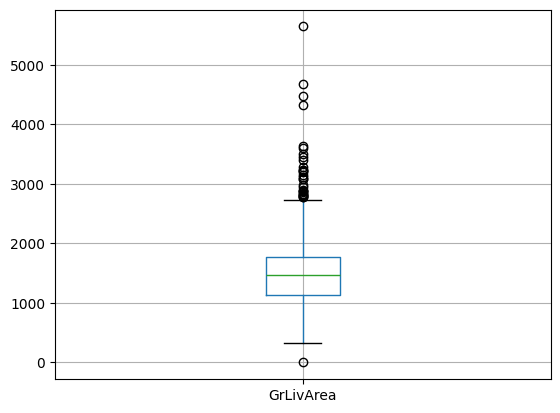

In [34]:
data[['GrLivArea']].boxplot();

In [35]:
data['GrLivArea'].min()

-1

In [36]:
data['GrLivArea'] == -1

1166    False
1198    False
1667    False
1149    False
576     False
        ...  
270     False
1206    False
869     False
546     False
239     False
Name: GrLivArea, Length: 1460, dtype: bool

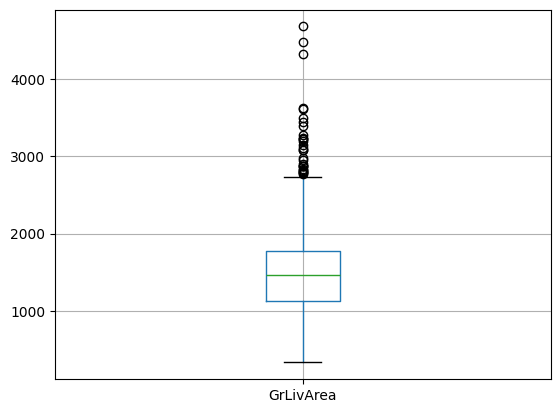

In [37]:
# Save the indexes corresponding to rows
# without the absurd -1 value
# and without large mansions (>5000 ft)
boolean_mask = (data['GrLivArea']>0) & (data['GrLivArea']<5000)
# Apply the boolean filtering
data = data[boolean_mask].reset_index(drop=True)
# Visualize the boxplot again
data[['GrLivArea']].boxplot();

In [38]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1167,20,RL,64.0,10475,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,245350
1,1199,20,RL,70.0,9100,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,178000
2,1367,60,RL,68.0,9179,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Abnorml,193000


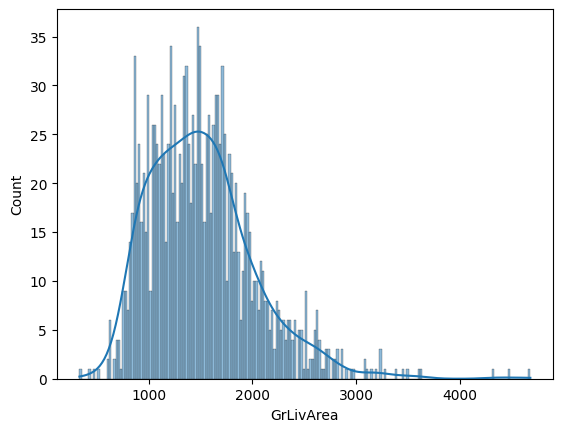

In [39]:
import seaborn as sns
sns.histplot(data['GrLivArea'], bins=200,kde=True);

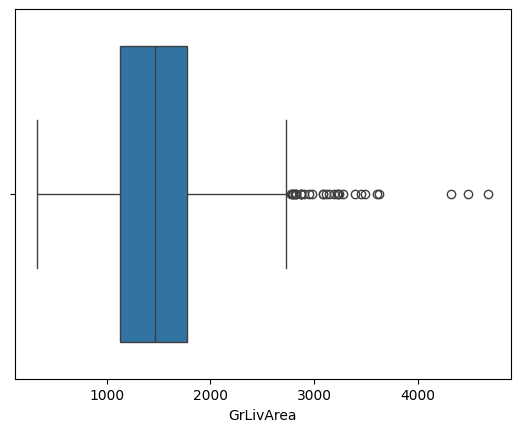

In [40]:
sns.boxplot(data=data, x='GrLivArea');

In [41]:
from sklearn.preprocessing import RobustScaler
# Step 0 - Instantiate Robust Scaler
rb_scaler = RobustScaler()
# Step 1 - Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR
rb_scaler.fit(data[['GrLivArea']])
# Step 2 - Scale / Transform
# to apply the transformation (value - median) / IQR for every house
data['GrLivArea'] = rb_scaler.transform(data[['GrLivArea']])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1167,20,RL,64.0,10475,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,245350
1,1199,20,RL,70.0,9100,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,178000
2,1367,60,RL,68.0,9179,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Abnorml,193000
3,1150,70,RM,50.0,9000,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,143000
4,577,50,RL,52.0,6292,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,145000


In [42]:
example = pd.DataFrame({"classes":["bad", "average", "average", "good", "good", "bad", "good"]})
example

,classes
0,bad
1,average
2,average
3,good
4,good
5,bad
6,good


In [43]:
from sklearn.preprocessing import OrdinalEncoder
# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder()
# Fit it
ordinal_encoder.fit(example[["classes"]])
# Display the learned categories
display(ordinal_encoder.categories_)
# Transform categories into ordered numbers
example["encoded_classes"] = ordinal_encoder.transform(example[["classes"]])
# Show the transformed classes
example

[array(['average', 'bad', 'good'], dtype=object)]

,classes,encoded_classes
0,bad,1.0
1,average,0.0
2,average,0.0
3,good,2.0
4,good,2.0
5,bad,1.0
6,good,2.0


In [44]:
 from sklearn.preprocessing import OrdinalEncoder
# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories=[["bad","average","good"]])
# Fit it
ordinal_encoder.fit(example[["classes"]])
# Display the learned categories
display(ordinal_encoder.categories_)
# Transform categories into ordered numbers
example["encoded_classes"] = ordinal_encoder.transform(example[["classes"]])
# Show the transformed classes
example

[array(['bad', 'average', 'good'], dtype=object)]

,classes,encoded_classes
0,bad,0.0
1,average,1.0
2,average,1.0
3,good,2.0
4,good,2.0
5,bad,0.0
6,good,2.0


In [45]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Check unique values for streets (3)
print(f"The unique values for 'Alley' are {data.Alley.unique()}")
# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
# Fit encoder
ohe.fit(data[['Alley']])
# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

The unique values for 'Alley' are ['NoAlley' 'Grvl' 'Pave']
The categories detected by the OneHotEncoder are [array(['Grvl', 'NoAlley', 'Pave'], dtype=object)]


In [46]:
# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")
# Transform the current "Alley" column
data[ohe.get_feature_names_out()] = ohe.transform(data[['Alley']])
# Drop the column "Alley" which has been encoded
data = data.drop(columns=["Alley"])
# Show the dataset
data.head(3)

The column names for the encoded values are ['Alley_Grvl' 'Alley_NoAlley' 'Alley_Pave']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_NoAlley,Alley_Pave
0,1167,20,RL,64.0,10475,Pave,IR1,Lvl,AllPub,Corner,...,NaN,0,2,2010,WD,Normal,245350,0.0,1.0,0.0
1,1199,20,RL,70.0,9100,Pave,Reg,Lvl,AllPub,Inside,...,NaN,0,6,2009,WD,Normal,178000,0.0,1.0,0.0
2,1367,60,RL,68.0,9179,Pave,IR1,Lvl,AllPub,Inside,...,NaN,0,6,2008,WD,Abnorml,193000,0.0,1.0,0.0


In [47]:
from sklearn.preprocessing import OneHotEncoder
# Check unique values for streets (2)
print(f"The unique values for 'Street' are {data.Street.unique()}")
# Instantiate the OneHotEncoder
ohe_binary = OneHotEncoder(sparse_output=False, drop="if_binary")
# Fit encoder
ohe_binary.fit(data[['Street']])
# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe_binary.categories_}")
data.columns

The unique values for 'Street' are ['Pave' 'Grvl']
The categories detected by the OneHotEncoder are [array(['Grvl', 'Pave'], dtype=object)]


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'Pesos', 'RoofSurface', 'ChimneyStyle', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
 

In [48]:
 # Display the generated names
print(f"The column names for the encoded values are {ohe_binary.get_feature_names_out()}")
# Transform the current "Street" column
data[ohe_binary.get_feature_names_out()] = ohe_binary.transform(data[['Street']])
# Drop the column "Street" which has been encoded
data = data.drop(columns=["Street"])
# Show the dataset
data.head(3)

The column names for the encoded values are ['Street_Pave']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_NoAlley,Alley_Pave,Street_Pave
0,1167,20,RL,64.0,10475,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2010,WD,Normal,245350,0.0,1.0,0.0,1.0
1,1199,20,RL,70.0,9100,Reg,Lvl,AllPub,Inside,Gtl,...,0,6,2009,WD,Normal,178000,0.0,1.0,0.0,1.0
2,1367,60,RL,68.0,9179,IR1,Lvl,AllPub,Inside,Gtl,...,0,6,2008,WD,Abnorml,193000,0.0,1.0,0.0,1.0


In [49]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [50]:
target = penguins["species"]
target.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder
# Instantiate the LabelEncoder
label_encoder = LabelEncoder()
# Fit it to the target
label_encoder.fit(target)
# Find the encoded classes
print(f"The Label Encoder has encoded the penguin classes into {label_encoder.classes_}")
# Transform the targets
encoded_target = label_encoder.transform(target)

The Label Encoder has encoded the penguin classes into ['Adelie' 'Chinstrap' 'Gentoo']


In [52]:
# Showing the target and the encoded target side by side
pd.DataFrame({"target": target, "encoded_target": encoded_target}).sample(10)

,target,encoded_target
324,Gentoo,2
188,Chinstrap,1
117,Adelie,0
190,Chinstrap,1
269,Gentoo,2
112,Adelie,0
317,Gentoo,2
181,Chinstrap,1
57,Adelie,0
270,Gentoo,2


In [53]:
original_target = label_encoder.inverse_transform(encoded_target)

In [54]:
# Showing the encoded target and the original target side by side
pd.DataFrame({"encoded_target": encoded_target, "original_target":original_target, "target": target}).sample(10)

,encoded_target,original_target,target
127,0,Adelie,Adelie
9,0,Adelie,Adelie
323,2,Gentoo,Gentoo
319,2,Gentoo,Gentoo
198,1,Chinstrap,Chinstrap
176,1,Chinstrap,Chinstrap
138,0,Adelie,Adelie
28,0,Adelie,Adelie
60,0,Adelie,Adelie
119,0,Adelie,Adelie


In [55]:
data['SalePriceBinary'] = pd.cut(x=data['SalePrice'],
 bins=[data['SalePrice'].min()-1,
 data['SalePrice'].mean(),
 data['SalePrice'].max()+1],
 labels=['cheap', 'expensive'])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_NoAlley,Alley_Pave,Street_Pave,SalePriceBinary
0,1167,20,RL,64.0,10475,IR1,Lvl,AllPub,Corner,Gtl,...,2,2010,WD,Normal,245350,0.0,1.0,0.0,1.0,expensive
1,1199,20,RL,70.0,9100,Reg,Lvl,AllPub,Inside,Gtl,...,6,2009,WD,Normal,178000,0.0,1.0,0.0,1.0,cheap
2,1367,60,RL,68.0,9179,IR1,Lvl,AllPub,Inside,Gtl,...,6,2008,WD,Abnorml,193000,0.0,1.0,0.0,1.0,expensive
3,1150,70,RM,50.0,9000,Reg,Lvl,AllPub,Inside,Gtl,...,7,2009,WD,Normal,143000,0.0,1.0,0.0,1.0,cheap
4,577,50,RL,52.0,6292,Reg,Lvl,AllPub,Inside,Gtl,...,8,2009,WD,Normal,145000,0.0,1.0,0.0,1.0,cheap


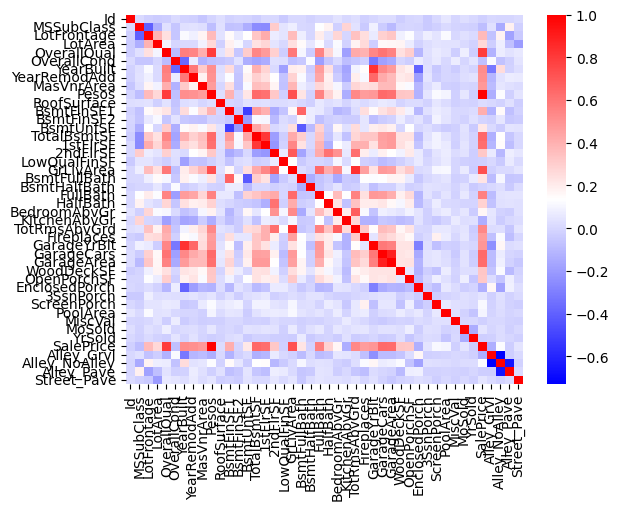

In [56]:
import seaborn as sns
# Heatmap of pairwise correlations
correlation_matrix = data.select_dtypes('number').corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [57]:
# Convert the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()
# Rename the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']
# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

In [58]:
# Compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])
# Show the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(5*2)

,feature_1,feature_2,correlation,absolute_correlation
435,Pesos,SalePrice,0.990351,0.990351
1725,SalePrice,Pesos,0.990351,0.990351
1304,GarageArea,GarageCars,0.887607,0.887607
1261,GarageCars,GarageArea,0.887607,0.887607
817,GrLivArea,TotRmsAbvGrd,0.828094,0.828094
1118,TotRmsAbvGrd,GrLivArea,0.828094,0.828094
1194,GarageYrBlt,YearBuilt,0.825491,0.825491
291,YearBuilt,GarageYrBlt,0.825491,0.825491
631,TotalBsmtSF,1stFlrSF,0.807360,0.807360
674,1stFlrSF,TotalBsmtSF,0.807360,0.807360


In [59]:
data = data.drop(columns=['Pesos'])

In [60]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_NoAlley,Alley_Pave,Street_Pave,SalePriceBinary
0,1167,20,RL,64.0,10475,IR1,Lvl,AllPub,Corner,Gtl,...,2,2010,WD,Normal,245350,0.0,1.0,0.0,1.0,expensive
1,1199,20,RL,70.0,9100,Reg,Lvl,AllPub,Inside,Gtl,...,6,2009,WD,Normal,178000,0.0,1.0,0.0,1.0,cheap
2,1367,60,RL,68.0,9179,IR1,Lvl,AllPub,Inside,Gtl,...,6,2008,WD,Abnorml,193000,0.0,1.0,0.0,1.0,expensive
3,1150,70,RM,50.0,9000,Reg,Lvl,AllPub,Inside,Gtl,...,7,2009,WD,Normal,143000,0.0,1.0,0.0,1.0,cheap
4,577,50,RL,52.0,6292,Reg,Lvl,AllPub,Inside,Gtl,...,8,2009,WD,Normal,145000,0.0,1.0,0.0,1.0,cheap


In [61]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# Encode the target
target_encoder = LabelEncoder().fit(data['SalePriceBinary'])
y = target_encoder.transform(data['SalePriceBinary'])
# Define the features
X = data.drop(columns=['SalePrice', 'SalePriceBinary'])
# Scale numerical features
# Notice that we already RobutScaled GrLivArea
minmax_scaler = MinMaxScaler()
X[["BedroomAbvGr","KitchenAbvGr","OverallCond"]] = minmax_scaler.fit_transform(X[["BedroomAbvGr","KitchenAbvGr","OverallCond"]])
# Instantiate a model
log_reg = LogisticRegression(max_iter=1000)
# Score on multiple folds aka Cross Validation
scores = cross_val_score(log_reg, X, y, cv=10)
scores.mean()

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1222, in fit
    X, y = validate_data(
  File "c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
  File "c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'RL'


In [63]:
data[["MSZoning"]].head()

,MSZoning
0,RL
1,RL
2,RL
3,RM
4,RL


In [ ]:
from sklearn.model_selection import cross_val_score
# Model to be cross-validated
log_model = LogisticRegression()
# Cross Validation
np.mean(cross_val_score(log_model, X, y , cv=5))

In [ ]:
from sklearn.inspection import permutation_importance
# Fit model
log_model = LogisticRegression().fit(X, y)
# Perform the permutation
permutation_score = permutation_importance(log_model, X, y, n_repeats=10)
# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
 permutation_score.importances_mean)).T)
importance_df.columns=['feature','score decrease']
# Show the important features
importance_df.sort_values(by="score decrease", ascending=False)

In [ ]:
# Selecting the strongest features
strongest_features = X[["GrLivArea", "BedroomAbvGr"]]
# Re-instantiating a Logistic Regression
log_reg = LogisticRegression()
# Average accuracy of the cross-validated model
np.mean(cross_val_score(log_reg, strongest_features, y, cv=10))